Importing of the libraries

In [1]:
import numpy as np #for handling arrays
import pandas as pd #for data frame
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns # plotting
import sklearn.datasets # datasets and ml algorithms(boston dataset)
from sklearn.model_selection import train_test_split #split data into 
#train and test set
from xgboost import XGBRegressor #algorithm
from sklearn import metrics #model evaluation



Importing the California house pricing dataset

In [2]:
from sklearn.datasets import fetch_california_housing
house_price_dataset = fetch_california_housing()


In [3]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

Loading the dataset to a pandas dataframe

In [4]:
#columns is just the name of features
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)

Print first 5 rows of our dataframe

In [5]:
#price is missing because we have imported just data array and not traget array
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
#add target(price) column 
house_price_dataframe["price"]= house_price_dataset.target
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
#check for missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [8]:
#statistical measures of dataset (mean,median,std_dev etc)
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding correlation between various features in the dataset 


1.Positive correlation(direct relation)


2.Negative correlation(inverse relation)

In [9]:
correlation= house_price_dataframe.corr()

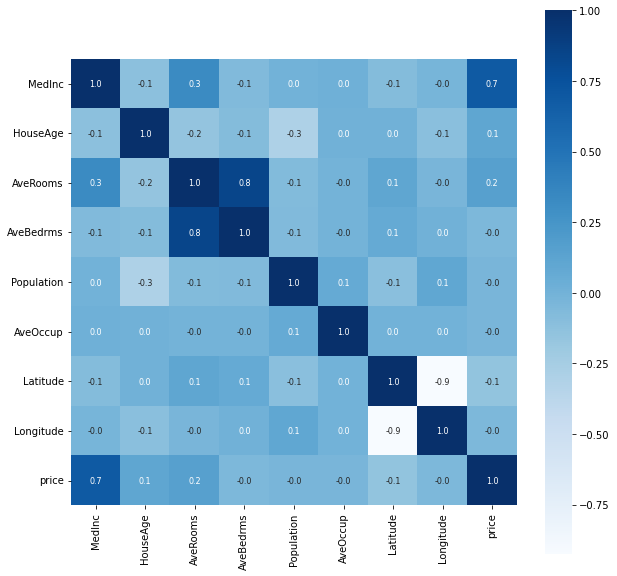

In [ ]:
#constructing a heat map
#cbar = bar at right
#sqaures = values in graph rep by squares
#fmt = dp on values (1dp)
#annot = feature names

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8}, cmap="Blues")


Splitting the data and target 

In [10]:
x=house_price_dataframe.drop(["price"], axis=1)# axis is 1 since we are 
#dropping a column
#if row axis=0
y=house_price_dataframe["price"]
print (x)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Splitting the data unto training data and test data

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [12]:
print(x.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training (XGBoost regressor model)
Linear regression model


In [13]:
# loading the model
model = XGBRegressor()

In [14]:
#training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation of the model

Prediction on training data(given the X_train should predict Y_train)

In [ ]:
#accuracy on prediction for training data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[0.5106896 3.259647  0.7520858 ... 1.6448892 1.7609202 0.8609372]


In [ ]:
# R squared error
score_1= metrics.r2_score(Y_train,training_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)

print("The r squared error is ",score_1)

print("The mean absolute error is ",score_2)

The r squared error is  0.8040717007536332
The mean absolute error is  0.3567039052104632


Model error is very minimal therefore indicating model performance is high


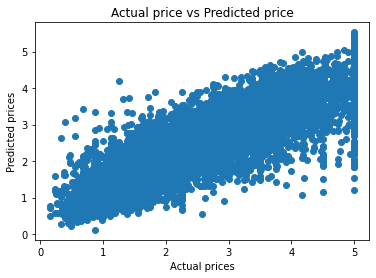

In [ ]:
#visualizing actual prices and predicted prices to see how close the prediction is
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual price vs Predicted price")
plt.show()

Prediction on test data

In [ ]:
#accuracy on prediction for test data
test_data_prediction = model.predict(X_test)

In [ ]:
# R squared error
score_1= metrics.r2_score(Y_test,test_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)

print("The r squared error is ",score_1)

print("The mean absolute error is ",score_2)

The r squared error is  0.7827492630044839
The mean absolute error is  0.368917494311536


Making a predictive system

AttributeError: ignored